In [21]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
import copy

palavras_mais_usadas = 10000
tamanho_maximo = 500
tamanho_da_camada_de_incorporacao = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=palavras_mais_usadas)

x_train = sequence.pad_sequences(x_train,tamanho_maximo)
x_test = sequence.pad_sequences(x_test,tamanho_maximo)

In [22]:
json_dicionario = imdb.get_word_index()
dicionarioPalavras = list(json_dicionario.keys())
dicionarioNumeros = list(json_dicionario.values())
def traduzir(revisao):
    retorno = []
    for palavra in revisao:
        if(palavra == 0):
            retorno.append('')
        elif(palavra == 1):
            retorno.append('>')
        elif(palavra == 2):
            retorno.append('?')
        else:
            index = dicionarioNumeros.index(palavra - 3)
            retorno.append(dicionarioPalavras[index])
    return ' '.join(retorno)  

In [23]:
model = Sequential()
model.add(Embedding(palavras_mais_usadas, tamanho_da_camada_de_incorporacao, input_length = tamanho_maximo))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
treino = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs=5, batch_size=128 )

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 6s 255us/step - loss: 0.5093 - accuracy: 0.7166 - val_loss: 0.2901 - val_accuracy: 0.8768
Epoch 2/5
25000/25000 [==============================] - 7s 275us/step - loss: 0.1846 - accuracy: 0.9307 - val_loss: 0.2864 - val_accuracy: 0.8826
Epoch 3/5
25000/25000 [==============================] - 6s 240us/step - loss: 0.0647 - accuracy: 0.9822 - val_loss: 0.3500 - val_accuracy: 0.8771
Epoch 4/5
25000/25000 [==============================] - 7s 266us/step - loss: 0.0158 - accuracy: 0.9974 - val_loss: 0.4297 - val_accuracy: 0.8712
Epoch 5/5
25000/25000 [==============================] - 6s 225us/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.4901 - val_accuracy: 0.8715


[]

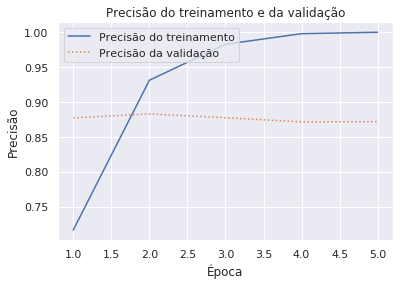

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
precisao = treino.history['accuracy']
validacao = treino.history['val_accuracy']
epochs = range(1, len(precisao) + 1)
plt.plot(epochs, precisao, '-', label='Precisão do treinamento')
plt.plot(epochs, validacao, ':', label='Precisão da validação')
plt.title('Precisão do treinamento e da validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend(loc='upper left')
plt.plot()

In [27]:
scores = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.15%
